In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import torch
from torch import nn
from nonlocalunet.blocks import *
from nonlocalunet.models import NonLocalUnet
from nonlocalunet.infer import infer
from liverfiles.metrics import mhd_score, dr_score
from liverfiles.utils import get_nii

In [5]:
X = torch.rand((4,2,16,16,16))  # b, c, d, h, w

In [3]:
gab = GlobalAggregationBlock(in_channels=1,
                             out_channels = 3,
                             ck=6,
                             cv=5,
                            query_transform='down')
gab(X).shape

torch.Size([1, 3, 8, 8, 8])

In [4]:
dsb = DownSamplingBlock(1, 4)
dsb(X).shape

torch.Size([1, 4, 8, 8, 8])

In [5]:
usb = UpSamplingBlock(1, 4, 4, 4)
usb(X).shape

torch.Size([1, 4, 32, 32, 32])

In [6]:
bb = BottomBlock(1, 4, 4)
bb(X).shape

torch.Size([1, 1, 16, 16, 16])

In [8]:
ip = InputBlock(1)
ip(X).shape

torch.Size([1, 1, 16, 16, 16])

In [ ]:
model = NonLocalUnet(1, 2)
model(X).shape

# Metrics

In [4]:
test = (np.random.rand(4,2,16,16,16)>0.5).astype('int')

In [9]:
mhd_score(test, test)

array([0., 0.])

In [7]:
dr_score(test*0, test)

array([0., 0.])

# Inference

In [2]:
img_path = "data\\volume_pt1\\volume-0.nii"
img = get_nii(img_path)

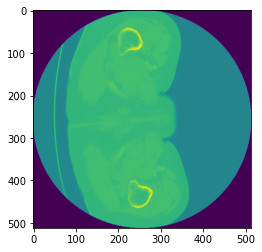

In [24]:
plt.imshow(img[:,:,0])

In [2]:
#img
img_path = "data\\volume_pt1\\volume-0.nii"
out_classes = 2
model = NonLocalUnet(1, out_classes)
input_shape = (8, 8, 8)
window = (8, 8, 8)
batch_size = 4
num_workers = 5
img = get_nii(img_path)
img = np.expand_dims(img, 0)
device = 'cuda'

In [3]:
result = infer(model, img, input_shape, out_classes, window, batch_size, num_workers, device)

In [5]:
result.shape

(2, 512, 512, 75)